In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pathlib

path = pathlib.Path.cwd()
path

PosixPath('/media/green/Dropbox/Projects/muon-id/guided-iteration')

/media/green/Dropbox/Projects/muon-id/guided-iteration/runs/run-hl-jetPT-ircSafe-superSmallSet-smallKB-8Cones
/media/green/Dropbox/Projects/muon-id/guided-iteration/runs/run-hl-jetPT-8Cones
/media/green/Dropbox/Projects/muon-id/guided-iteration/runs/run-hl-jetPT-ircSafe-smallSet-smallKB-8Cones


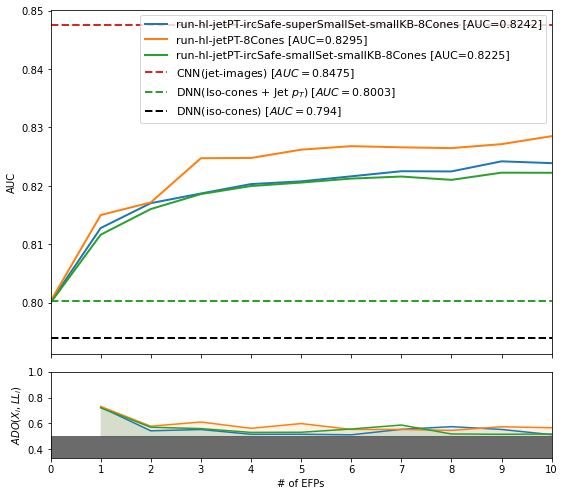

In [40]:
def performance_plot(keyword):
    # Determine the number of completed passes
    ll_benchmark = 0.8475
    hl_only = 0.794

    # Initialize plot
    fig, (ax0, ax1) = plt.subplots(
        2, sharex=True, figsize=(8, 7), gridspec_kw={"height_ratios": [4, 1]}
    )

    run_path = path / "runs"
    longest_run, hl_pt_max = 0, 0
    longest_x = 0
    for run in run_path.glob("*"):
        if keyword in str(run):
            print(run)
            try:
                # Get pass data
                df = pd.read_csv(run / "selected_efps.csv")
                pass_ix = df.index.values
                auc_ix = df.auc.values
                ado_ix = df.ado.values
                if len(ado_ix) > longest_x:
                    longest_x = len(ado_ix)
                ax0.plot(
                    pass_ix,
                    auc_ix,
                    label=f"{run.stem} [AUC={max(auc_ix):.4}]",
                    lw=2
                )
                ax0.set_ylabel("AUC")

                ax1.plot(pass_ix, ado_ix)
                ax1.fill_between(pass_ix, ado_ix, 0.5, alpha=0.1)
                ax1.axhspan(0, 0.5, facecolor='k', alpha=0.25)
                ax1.set_ylim([1./3, 1.0])
                ax1.set_ylabel("$ADO(X_i, LL_i)$")
                if len(auc_ix) > longest_run:
                    longest_run = len(auc_ix)
                if auc_ix[0] > hl_pt_max:
                    hl_pt_max = auc_ix[0]
            except:
                pass

    ax0.hlines(
        ll_benchmark,
        0,
        longest_x,
        label=f"CNN(jet-images) $[AUC={ll_benchmark:.4}]$",
        color="tab:red",
        linestyle="dashed",
        lw=2
    )
    ax0.hlines(
        hl_pt_max,
        0,
        longest_x,
        label=f"DNN(Iso-cones + Jet $p_T$) $[AUC={hl_pt_max:.4}]$",
        color="tab:green",
        linestyle="dashed",
        lw=2
    )
    ax0.hlines(
        hl_only,
        0,
        longest_x,
        label=f"DNN(iso-cones) $[AUC={hl_only:.4}]$",
        color="k",
        linestyle="dashed",
        lw=2
    )

    # ax0.legend(bbox_to_anchor=(1.05, 1.05), loc="lower right", ncol=3, fontsize=12)
    ax0.legend(fontsize=11)

    x_max = 10 #longest_x-1

    plt.xlim([0, x_max])
    plt.xlabel("# of EFPs")

    # plt.xticks(pass_ix)
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    fig.subplots_adjust(hspace=0.1)
    plt.tight_layout()
    plt.savefig(path / "figures" / f"{keyword}_compare_performance_plots.png")
    plt.savefig(path / "figures" / f"{keyword}_compare_performance_plots.pdf")
    plt.show()
    
performance_plot(keyword="8Cones")